# ANN and Backpropagation

Building Artificial Neural Network (ANN) model is a bit like making a black box for me at this point. Deep learning modeling contains a lot of "trial and error" processes, but I believe that a deeper understanding will lead more efficient modeling process.

# Goal
I have two questions about the ANN at this point:
* Why it is called "Back" propagation: The term backpropagation is a bit ambiguous for me. Does the term "back" means the order of update and optimization? (from output to input layer?) Or does it just mean the error from the "back" is required to optimize the model?
* How are the parameters in each node updated "individually"

# Approach
* Build a model with 2 hidden layers that takes two numbers in and returns two numbers out.
* Use "Relu" as an activation function.
* Try to optimize the parameters manually and see if order matters.
* Try to update the parameters by minimizing the Mean Squared Error (MSE) of the predicted and real values.

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Define Activation function
def relu(x):
    if type(x) == int or type(x) == float or type(x) == np.float64:
        return max(0,x)
    elif type(x) == list or type(x) == np.ndarray:
        answer=[]
        for item in x:
            answer.append(max(0,item))
        return answer

# Derivative of Relu: Assign drelu(x=0) = 1 because it is undefined at x=0.
def drelu(x):
    if type(x) == int or type(x) == float or type(x) == np.float64:
        if x<0:
            return 0
        else:
            return 1
    elif type(x) == list or type(x) == np.ndarray:
        answer=[]
        for item in x:
            if item<0:
                answer.append(0)
            else:
                answer.append(1)
        return answer

## The ANN Model With 2 Hidden Layers

I will make a model takes one entry with $x_{1}=0.8$ and $x_{2}=0.3$ and return two numbers $\hat{y_{1}}$ and $\hat{y_{2}}$. The training process will optimize the model by minimizing the Root Mean Squared Error (RMSE) between real label ($y_{1}$, $y_{2}$) and the output ($\hat{y_{1}}$, $\hat{y_{2}}$). In order to do that, I will use the gradient descent method.

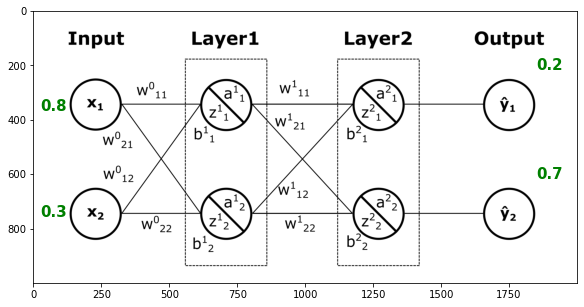

__The superscript (k) indicates the index of the layer and the subscript (i,j) means the index of the vector (or the matrix).__

Each node in hidden layers computes the input number as follows:
* The numbers from the previous step ($x_{1}$, $x_{2}$ for the Layer 1, $a^{(1)}_{1}$, $a^{(1)}_{2}$ for the Layer 2), weight ($w^{(k)}_{ij}$), and bias($b^{(k)}_{i}$) are used to calculate the $z^{(k)}_{i}$.
* For example, $z^{(1)}_{1}=w^{(1)}_{11}x_{1}+w^{(1)}_{12}x_{2}+b^{(1)}_{1}$.
* The calculated $z$ is directly plugged into the activation function (ex. $a^{(1)}_{1}=Relu(z^{(1)}_{1}$))
* The values returned from the activation function are used as input values for the next layer.

Each font color means:
* Green: Fixed numbers
* Red  : The parameters before the optimization
* Blue : The optimized parameters

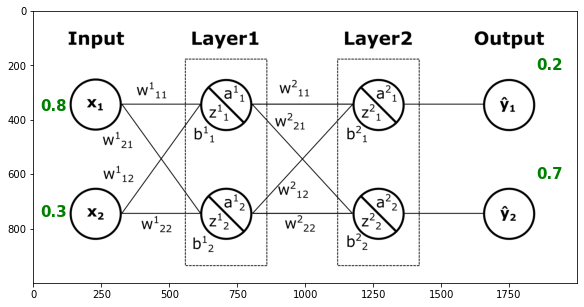

In [3]:
plt.figure(figsize=(10,5))
img = mpimg.imread('ANN_model.png')
plt.text(75,350,'0.8',color='green',va='center',ha='center',weight='bold',fontsize=15)
plt.text(75,740,'0.3',color='green',va='center',ha='center',weight='bold',fontsize=15)
plt.text(1850,200,'0.2',color='green',va='center',ha='left',weight='bold',fontsize=15)
plt.text(1850,600,'0.7',color='green',va='center',ha='left',weight='bold',fontsize=15)
plt.imshow(img);

In [4]:
def plot_with_params(w1=['w11','w12','w13','w14'], w2=['w21','w22','w23','w24'],
                     b1=['b11','b12'], b2=['b21','b22'], yhat=['y1','y2'],
                    w1_opt=False, w2_opt=False, b1_opt=False, b2_opt=False, yhat_opt=False):
    # Plot the schematic of the model with featured numbers
    img = mpimg.imread('ANN_model_noweights.png')
    plt.figure(figsize=(10,5))
    
    # Location of the texts
    w1_loc = [(450,280),(400,650),(400,450),(450,800)]
    w2_loc = [(980,280),(920,630),(920,450),(980,800)]
    b1_loc = [(720,500),(720,900)]
    b2_loc = [(1270,500),(1270,900)]
    yhat_loc = [(1750,200),(1750,600)]
    
    # Update the color: Optimized-> blue, Not-optimized->red
    w1_color, w2_color, b1_color, b2_color, yhat_color = 'red','red','red','red','red'
    if w1_opt:
        w1_color='blue'
    if w2_opt:
        w2_color='blue'
    if b1_opt:
        b1_color='blue'
    if b2_opt:
        b2_color='blue'
    if yhat_opt:
        yhat_color='blue'
        
    # Round numbers if numeric
    round_w1, round_w2, round_b1, round_b2, round_yhat = [],[],[],[],[]
    round_params = [round_w1, round_w2, round_b1, round_b2, round_yhat]
    params = [w1,w2,b1,b2,yhat]
    
    for idx, param in enumerate(params):
        for item in param:
            if type(item) == int or type(item) == float or type(item) == np.float64:
                item = round(item,3)
            round_params[idx].append(item)
    
    # Plot weights
    for idx in range(len(w1)):
        tw1 = plt.text(w1_loc[idx][0],w1_loc[idx][1], round_w1[idx], color=w1_color, va='center', ha='center', fontsize=12)
        tw2 = plt.text(w2_loc[idx][0],w2_loc[idx][1], round_w2[idx], color=w2_color, va='center', ha='center', fontsize=12)
        tw1.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='black'))
        tw2.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='black'))
    
    # Plot biases
    for idx in range(len(b1)):
        tb1 = plt.text(b1_loc[idx][0],b1_loc[idx][1], round_b1[idx], color=b1_color, va='center', ha='center', fontsize=12)
        tb2 = plt.text(b2_loc[idx][0],b2_loc[idx][1], round_b2[idx], color=b2_color, va='center', ha='center', fontsize=12)
        tb1.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='black'))
        tb2.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='black'))
    
    # Plot predicted values: yhat
    for idx in range(len(yhat)):
        plt.text(yhat_loc[idx][0],yhat_loc[idx][1], round_yhat[idx], color=yhat_color, va='center', ha='center',
                 fontsize=15, weight='bold')
        
    # Plot Input and Label
    plt.text(75,350,'0.8',color='green',va='center',ha='center',weight='bold',fontsize=15)
    plt.text(75,740,'0.3',color='green',va='center',ha='center',weight='bold',fontsize=15)
    plt.text(1850,200,'0.2',color='green',va='center',ha='left',weight='bold',fontsize=15)
    plt.text(1850,600,'0.7',color='green',va='center',ha='left',weight='bold',fontsize=15)
    
    plt.imshow(img)

## Forward Propagation: Mean Squared Error

To begin with, we need an initialized condition to propagate the numbers through the model. A simple intianlize condition is applied: Plug 0.1 into all parameters. The predicted values ($\hat{y_{1}}$, $\hat{y_{2}}$) are calculated as follows:

$$\begin{bmatrix} z^{(1)}_{1}\\z^{(1)}_{2} \end{bmatrix} =
\begin{bmatrix} w^{(1)}_{11} & w^{(1)}_{12}\\w^{(1)}_{21} & w^{(1)}_{22} \end{bmatrix} \cdot
\begin{bmatrix} x_{(1)}\\x_{2} \end{bmatrix} +
\begin{bmatrix} b^{(1)}_{1}\\b^{(1)}_{2} \end{bmatrix}$$

$$\begin{bmatrix} a^{(1)}_{1}\\a^{(1)}_{2} \end{bmatrix} = 
\begin{bmatrix} Relu({z^{(1)}_{1}})\\Relu({z^{(1)}_{2}}) \end{bmatrix}$$

$$\begin{bmatrix} z^{(2)}_{1}\\z^{(2)}_{2} \end{bmatrix} =
\begin{bmatrix} w^{(2)}_{11} & w^{(2)}_{12} \\ w^{(2)}_{21} & w^{(1)}_{22} \end{bmatrix} \cdot
\begin{bmatrix} a^{(1)}_{1}\\a^{(1)}_{2} \end{bmatrix} +
\begin{bmatrix} b^{(2)}_{1}\\b^{(2)}_{2} \end{bmatrix}$$

$$\begin{bmatrix} \hat{y_{1}} \\ \hat{y_{2}} \end{bmatrix} = 
\begin{bmatrix} a^{(2)}_{1} \\ a^{(2)}_{2} \end{bmatrix} = 
\begin{bmatrix} Relu({z^{(2)}_{1}}) \\ Relu({z^{(2)}_{2}}) \end{bmatrix}$$

The equations above can be expressed in more general terms as follows:

$$\begin{bmatrix} z^{(k)}_{1} \\ z^{(k)}_{2} \end{bmatrix} = 
\begin{bmatrix} w^{(k)}_{11} & w^{(k)}_{12} \\ w^{(k)}_{21} & w^{(k)}_{22} \end{bmatrix} \cdot
\begin{bmatrix} a^{(k-1)}_{1} \\ a^{(k-1)}_{2} \end{bmatrix} + 
\begin{bmatrix} b^{(k)}_{1} \\ b^{(k)}_{2} \end{bmatrix}$$

$$\begin{bmatrix} a^{(k)}_{1} \\ a^{(k)}_{2} \end{bmatrix}=
\begin{bmatrix} Relu(z^{(k)}_{1}) \\ Relu(z^{(k)}_{2}) \end{bmatrix}
$$

The MSE is defined as following equation:

$$\begin{align}
E & = E_{1} + E_{2}
\\ & = \frac{\sum_{i=1,2}(y_{i}-\hat{y_{i}})^{2}}{2}
\end{align}$$

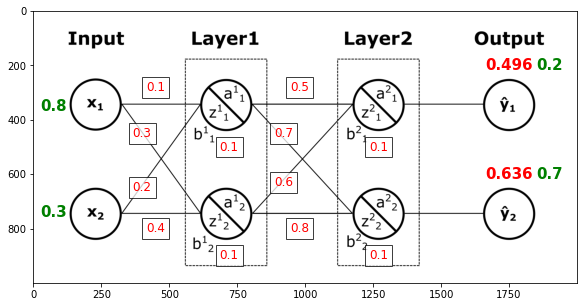

In [5]:
def get_yhat(x=[0.8,0.3], y=[0.2,0.7], w1=[0.1,0.2,0.3,0.4], w2=[0.5,0.6,0.7,0.8], b1=[0.1,0.1], b2=[0.1,0.1]):
    # Reshape w1 and w2 to matrix form
    w1=np.reshape(w1,(2,2))
    w2=np.reshape(w2,(2,2))
    
    # 1st Layer
    z1=np.dot(w1,x)+b1
    a1=[max(0,item) for item in z1]
    
    # 2nd Layer
    z2=np.dot(w2,a1)+b2
    a2=[max(0,item) for item in z2]
    return a2

def mean_square_error(yhat,y=[0.2,0.7]):
    err = list()
    for item1, item2 in zip(yhat, y):
        err.append((item1-item2)**2)
    return sum(err)/len(err)

In [6]:
yhat=get_yhat()
err = mean_square_error(yhat=yhat)
print(err)

0.04585599999999999


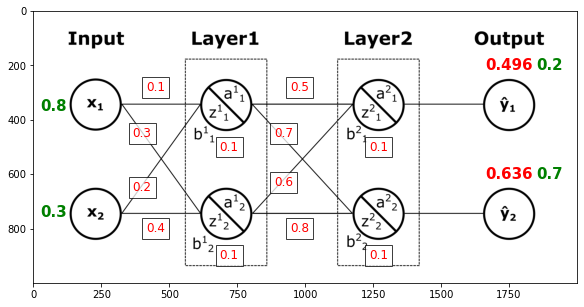

In [7]:
w1=[0.1,0.2,0.3,0.4]
w2=[0.5,0.6,0.7,0.8]
b1=[0.1,0.1]
b2=[0.1,0.1]

plot_with_params(w1=w1, w2=w2, b1=b1, b2=b2, yhat=get_yhat(w1=w1, w2=w2, b1=b1, b2=b2))

## Optimization
Find parameters that minimize the Mean Squared Error ($E$) using a gradient descent algorithm.

### Step 0: Defining Matrix and Vector Expression
To begin with, I clarify that the capital letters represent the vector or matrix form of parameters. For example,

$$W^{(k)} = \begin{bmatrix} w^{(k)}_{11} & w^{(k)}_{12} \\ w^{(k)}_{21} & w^{(k)}_{22} \end{bmatrix}$$
$$Z^{(k)} = \begin{bmatrix} z^{(k)}_{1} \\ z^{(k)}_{2} \end{bmatrix}$$

### Step 1: Derivatives for Gradient Descent - Layer 2
To perform gradient descent, it is necessary to calculate the derivative of the $E$ with respect to the parameter of interest: The parameters in $W^{(1)}$, $W^{(2)}$, $B^{(1)}$, and $B^{(2)}$. Let's start with the parameters in the second hidden layer (k=2; $W^{(2)}$ and $B^{(2)}$).

$$\begin{align}
\frac{\partial E}{\partial w^{(2)}_{ij}} & = \frac{\partial (E_{1}+E_{2})}{\partial w^{(2)}_{ij}}
\\ & = \frac{1}{2} \frac{\partial \sum_{n=1,2} (y_{n}-\hat{y_{n}})^{2}}{\partial w^{(2)}_{ij}}
\\ & = \sum_{n=1,2} (y_{n}-a^{2}_{n}) \cdot \left(-\frac{\partial a^{(2)}_{n}}{\partial w^{(2)}_{ij}}\right)\qquad \qquad (\hat{y_{n}}=a^{(2)}_{n})
\\ & = \sum_{n=1,2} (a^{(2)}_{n}-y_{n}) \cdot \left(\frac{\partial a^{(2)}_{n}}{\partial z^{(2)}_{n}} \right) \cdot
\left( \frac{\partial z^{(2)}_{n}}{\partial w^{(2)}_{ij}} \right)
\\ \frac{\partial E}{\partial b^{(2)}_{j}} & = \frac{\partial (E_{1}+E_{2})}{\partial b^{(2)}_{j}}
\\ & = \frac{1}{2} \frac{\partial \sum_{n=1,2} (y_{n}-\hat{y_{n}})^{2}}{\partial b^{(2)}_{j}}
\\ & = \sum_{n=1,2} (y_{n}-a^{(2)}_{n}) \cdot \left(-\frac{\partial a^{(2)}_{n}}{\partial b^{(2)}_{j}}\right)\qquad \qquad (\hat{y_{n}}=a^{(2)}_{n})
\\ & = \sum_{n=1,2} (a^{(2)}_{n}-y_{n}) \cdot \left(\frac{\partial a^{(2)}_{n}}{\partial z^{(2)}_{n}} \right) \cdot
\left( \frac{\partial z^{(2)}_{n}}{\partial b^{(2)}_{j}} \right)
\end{align}$$

The $(a^{(2)}_{i}-y_{i})$ can be numerically calculated and $\frac{\partial a^{(2)}_{i}}{\partial z^{(2)}_{i}}$ is a derivative of the activation function. The $\frac{\partial z^{(2)}_{i}}{\partial w^{(2)}_{ij}}$ can be calculated as follows:

$$\begin{align} Z^{(2)} = \begin{bmatrix} z^{(2)}_{1} \\ z^{(2)}_{2} \end{bmatrix} & = \begin{bmatrix} w^{(2)}_{11} & w^{(2)}_{12} \\ w^{(2)}_{21} & w^{(2)}_{22} \end{bmatrix} \cdot \begin{bmatrix} a^{(1)}_{1} \\ a^{(1)}_{2} \end{bmatrix} + 
\begin{bmatrix} b^{(2)}_{1} \\ b^{(2)}_{2} \end{bmatrix}\\
\frac{\partial z_{n}^{(2)}}{\partial w^{(2)}_{ij}} & = \delta_{ni} a^{(1)}_{j}\\
\frac{\partial z_{n}^{(2)}}{\partial b^{(2)}_{j}} & = \delta_{nj} \end{align}$$

As a result, the component-wise gradient of error is:
$$\begin{align}
\frac{\partial E}{\partial w^{(2)}_{ij}} & = \sum_{n=1,2} (a^{(2)}_{n}-y_{n}) \cdot \left(\frac{\partial a^{(2)}_{n}}{\partial z^{(2)}_{n}} \right) \cdot \left( \frac{\partial z^{(2)}_{n}}{\partial w^{(2)}_{ij}} \right)
\\ & = \sum_{n=1,2} \left( a^{(2)}_{n}-y_{n} \right) \cdot Relu'(z^{(2)}_{n}) \cdot \delta_{ni}a^{(1)}_{j}
\\ \frac{\partial E}{\partial b^{(2)}_{j}} & = \sum_{n=1,2} (a^{(2)}_{n}-y_{n}) \cdot \left(\frac{\partial a^{(2)}_{n}}{\partial z^{(2)}_{n}} \right) \cdot \left( \frac{\partial z^{(2)}_{n}}{\partial b^{(2)}_{j}} \right)
\\ & = \sum_{n=1,2} \left( a_{n}^{(2)}-y_{n} \right) \cdot Relu'(z^{(2)}_{n}) \cdot \delta_{nj}
\end{align}$$

It is worth noting that if I conduct partial derivatives, I can define __"Local Gradient"__ of each neuron. The derivative above is only defined by the feeding ($a^{(k-1)}_{i}$) and output ($a^{(k)}_{i}$) parameters and the derivative of the activation function of the neuron.

### Step 2: The Local Gradient in Layer 2 to a Matrix Form
I found it more understandable for me to convert the equation above to a matrix form. The calculations above are equivalent to follows:

$$\begin{align}
\nabla_{W^{(2)}}E & = \begin{bmatrix} \frac{\partial E}{\partial w^{(2)}_{11}} & \frac{\partial E}{\partial w^{(2)}_{12}} \\ \frac{\partial E}{\partial w^{(2)}_{21}} & \frac{\partial E}{\partial w^{(2)}_{22}} \end{bmatrix}
\\ & = \begin{bmatrix} (a^{(2)}_{1}-y_{1}) \cdot Relu'(z^{(2)}_{1}) \cdot a^{(1)}_{1} & (a^{(2)}_{1}-y_{1}) \cdot Relu'(z^{(2)}_{1}) \cdot a^{(1)}_{2} \\ (a^{(2)}_{2}-y_{2}) \cdot Relu'(z^{(2)}_{2}) \cdot a^{(1)}_{1} & (a^{(2)}_{2}-y_{2}) \cdot Relu'(z^{(2)}_{2}) \cdot a^{(1)}_{2} \end{bmatrix} \\
\nabla_{B^{(2)}}E & = \begin{bmatrix} \frac{\partial E}{\partial b^{(2)}_{1}} \\ \frac{\partial E}{\partial b^{(2)}_{2}} \end{bmatrix}
\\ & = \begin{bmatrix} (a^{(2)}_{1}-y_{1}) \cdot Relu'(z^{(2)}_{1}) \\ (a^{(2)}_{2}-y_{2}) \cdot Relu'(z^{(2)}_{2})
\end{bmatrix}
\end{align}$$


In [8]:
# Define a function that updates the weights and bias of the second layer
def update_second_layer(w1,w2,b1,b2,yhat=get_yhat(),learning_rate=0.1,x=[0.8,0.3],y=[0.2,0.7]):
    # Reshape w1 and w2 to matrix form
    w1=np.reshape(w1,(2,2))
    w2=np.reshape(w2,(2,2))
    # 1st Layer
    z1=np.dot(w1,x)+b1
    a1=relu(z1)
    z2=np.dot(w2,a1)
    
    # Convert list -> array for substraction
    y=np.asarray(y)
    yhat=np.asarray(yhat)
    
    # Calculate gradient
    # Note:
    # when x=[1,2]
    # np.vstack((x,x)) = [[1,2],[1,2]] -> (a2-y) and (Relu'(z))
    # np.vstack((x,x)).T = [[1,1],[2,2]] -> a1
    
    grad_w2 = np.vstack((yhat-y,yhat-y)).T*np.vstack((drelu(z2),drelu(z2))).T*np.vstack((a1,a1))
    grad_b2 = (yhat-y)*(drelu(z2))
    
    # Update parameters with gradient descent
    updated_weight = w2 - grad_w2 * learning_rate
    updated_weight = list(np.reshape(updated_weight,(4,)))
    updated_b = b2 - grad_b2 * learning_rate
    
    return updated_weight, updated_b

### Step 3: Derivatives for Gradient Descent - Layer 1

The gradient of error with respect to the parameters in layer 1 can be calculated by similar approach above. Since it is far away from the final values, more parameters are involved in the calculation.

$$\begin{align}
\frac{\partial E}{\partial w^{(1)}_{ij}} & = \frac{\partial (E_{1}+E_{2})}{\partial w^{(1)}_{ij}}
\\ & = \frac{1}{2} \frac{\partial \sum_{n=1,2} (y_{n}-\hat{y_{n}})^{2}}{\partial w^{(1)}_{ij}}
\\ & = \sum_{n=1,2} (y_{n}-a^{2}_{n}) \cdot \left(-\frac{\partial a^{(2)}_{n}}{\partial w^{(1)}_{ij}}\right)\qquad \qquad (\hat{y_{n}}=a^{(2)}_{n})
\\ & = \sum_{n=1,2} (a^{(2)}_{n}-y_{n}) \cdot \left(\frac{\partial a^{(2)}_{n}}{\partial z^{(2)}_{n}} \right) \cdot
\left( \frac{\partial z^{(2)}_{n}}{\partial w^{(1)}_{ij}} \right)
\\ & = \sum_{n=1,2} (a^{(2)}_{n}-y_{n}) \cdot \left(\frac{\partial a^{(2)}_{n}}{\partial z^{(2)}_{n}} \right) \cdot
\left( \frac{\partial z^{(2)}_{n}}{\partial a^{(1)}_{m}} \right) \cdot \left(\frac{\partial a^{(1)}_{m}}{\partial w^{(1)}_{ij}} \right)
\\ & = \sum_{n=1,2} (a^{(2)}_{n}-y_{n}) \cdot \left(\frac{\partial a^{(2)}_{n}}{\partial z^{(2)}_{n}} \right) \cdot
\left( \frac{\partial z^{(2)}_{n}}{\partial a^{(1)}_{m}} \right) \cdot \left(\frac{\partial a^{(1)}_{m}}{\partial z^{(1)}_{m}} \right) \cdot \left( \frac{\partial z^{(1)}_{m}}{\partial w^{(1)}_{ij}} \right)
\\ & = \sum_{n=1,2} (a^{(2)}_{n}-y_{n}) \cdot \left(Relu'(z^{(2)}_{n}) \right) \cdot \left( w^{(2)}_{nm} \right) \cdot \left( Relu'(z^{(1)}_{m}) \right) \cdot \left( \delta_{im} x_{j} \right)
\\
\frac{\partial E}{\partial b^{(1)}_{j}} & = \frac{\partial (E_{1}+E_{2})}{\partial b^{(1)}_{j}}
\\ & = \frac{1}{2} \frac{\partial \sum_{n=1,2} (y_{n}-\hat{y_{n}})^{2}}{\partial b^{(1)}_{j}}
\\ & = \sum_{n=1,2} (y_{n}-a^{2}_{n}) \cdot \left(-\frac{\partial a^{(2)}_{n}}{\partial b^{(1)}_{j}}\right)\qquad \qquad (\hat{y_{n}}=a^{(2)}_{n})
\\ & = \sum_{n=1,2} (a^{(2)}_{n}-y_{n}) \cdot \left(\frac{\partial a^{(2)}_{n}}{\partial z^{(2)}_{n}} \right) \cdot
\left( \frac{\partial z^{(2)}_{n}}{\partial b^{(1)}_{j}} \right)
\\ & = \sum_{n=1,2} (a^{(2)}_{n}-y_{n}) \cdot \left(\frac{\partial a^{(2)}_{n}}{\partial z^{(2)}_{n}} \right) \cdot
\left( \frac{\partial z^{(2)}_{n}}{\partial a^{(1)}_{m}} \right) \cdot \left(\frac{\partial a^{(1)}_{m}}{\partial b^{(1)}_{j}} \right)
\\ & = \sum_{n=1,2} (a^{(2)}_{n}-y_{n}) \cdot \left(\frac{\partial a^{(2)}_{n}}{\partial z^{(2)}_{n}} \right) \cdot
\left( \frac{\partial z^{(2)}_{n}}{\partial a^{(1)}_{m}} \right) \cdot \left(\frac{\partial a^{(1)}_{m}}{\partial z^{(1)}_{m}} \right) \cdot \left( \frac{\partial z^{(1)}_{m}}{\partial b^{(1)}_{j}} \right)
\\ & = \sum_{n=1,2} (a^{(2)}_{n}-y_{n}) \cdot \left(Relu'(z^{(2)}_{n}) \right) \cdot \left( w^{(2)}_{nm} \right) \cdot \left( Relu'(z^{(1)}_{m}) \right) \cdot \left( \delta_{mj} \right)
\end{align}$$

Again, the matrix expression is:

$$\begin{align}
\nabla_{W^{(1)}}E & = \begin{bmatrix} \frac{\partial E}{\partial w^{(1)}_{11}} & \frac{\partial E}{\partial w^{(1)}_{12}} \\ \frac{\partial E}{\partial w^{(1)}_{21}} & \frac{\partial E}{\partial w^{(1)}_{22}} \end{bmatrix}
\\ & = \sum_{n=1,2} \begin{bmatrix} (a^{(2)}_{n}-y_{n}) \cdot Relu'(z^{(2)}_{n}) \cdot w^{(2)}_{n1} \cdot Relu'(z^{(1)}_{1}) \cdot x_{1} & (a^{(2)}_{n}-y_{n}) \cdot Relu'(z^{(2)}_{n}) \cdot w^{(2)}_{n1} \cdot Relu'(z^{(1)}_{1}) \cdot x_{2} \\
(a^{(2)}_{n}-y_{n}) \cdot Relu'(z^{(2)}_{n}) \cdot w^{(2)}_{n2} \cdot Relu'(z^{(1)}_{2}) \cdot x_{1} &
(a^{(2)}_{n}-y_{n}) \cdot Relu'(z^{(2)}_{n}) \cdot w^{(2)}_{n2} \cdot Relu'(z^{(1)}_{2}) \cdot x_{2} \end{bmatrix} \\
\nabla_{B^{(1)}}E & = \begin{bmatrix} \frac{\partial E}{\partial b^{(1)}_{1}} \\ \frac{\partial E}{\partial b^{(1)}_{2}} \end{bmatrix}
\\ & = \sum_{i=1,2} \begin{bmatrix} (a^{(2)}_{n}-y_{n}) \cdot Relu'(z^{(2)}_{n}) \cdot w^{(2)}_{n1} \cdot Relu'(z^{(1)}_{1}) \\
(a^{(2)}_{n}-y_{n}) \cdot Relu'(z^{(2)}_{n}) \cdot w^{(2)}_{n2} \cdot Relu'(z^{(1)}_{2}) \end{bmatrix}
\end{align}$$

In [9]:
# Define a function that updates the weights and bias of the first layer
def update_first_layer(w1,w2,b1,b2,yhat=get_yhat(),learning_rate=0.1,x=[0.8,0.3],y=[0.2,0.7]):
    # Reshape w1 and w2 to matrix form
    w1=np.reshape(w1,(2,2))
    w2=np.reshape(w2,(2,2))
    
    # 1st Layer
    z1=np.dot(w1,x)+b1
    a1=relu(z1)
    z2=np.dot(w2,a1)
    
    # Convert list -> array for substraction
    y=np.asarray(y)
    yhat=np.asarray(yhat)
    
    # Calculate gradient
    # Note:
    # when x=[1,2]
    # np.vstack((x,x)) = [[1,2],[1,2]] -> (a2-y) and (Relu'(z))
    # np.vstack((x,x)).T = [[1,1],[2,2]] -> a1
    
    grad_w1 = np.zeros(shape=(2,2))
    grad_b1 = np.zeros(shape=(2,))
    for n in [0,1]:
        for (i,j) in [(0,0),(0,1),(1,0),(1,1)]:
            grad_w1[i][j] += (yhat[n]-y[n])*drelu(z2[n])*w2[n][i]*drelu(z1[i])*x[j]
            if j == 0:    # To stop udating grad_b twice
                grad_b1[i] += (yhat[n]-y[n])*drelu(z2[n])*w2[n][i]*drelu(z1[i])
    
    # Update parameters with gradient descent
    updated_weight = w1 - grad_w1 * learning_rate
    updated_weight = list(np.reshape(updated_weight,(4,)))
    updated_b = b1 - grad_b1 * learning_rate
    
    return updated_weight, updated_b

### Step 4: Train the model

I define the update function for layers 1 and 2 separately for convenience. However, they do not have to be defined separately but can be updated simultaneously. Therefore __the term "BACK" propagation has nothing to do with update order__. I found backpropagation of derivatives when I apply the chain rule to calculate the gradient of the cost function.

I will try to train the model 20 times (20 steps of gradient descent) and check if my code works properly.

In [124]:
def train_model(epochs=10,learning_rate=0.1):
    # Initialize
    w1=[0.1,0.2,0.3,0.4]
    w2=[0.5,0.6,0.7,0.8]
    b1=[0.1,0.1]
    b2=[0.1,0.1]
    
    # Record the results
    history_yhat = []
    history_err = []
    yhat=get_yhat(w1=w1,w2=w2,b1=b1,b2=b2)
    history_yhat.append(yhat)
    err = mean_square_error(yhat=yhat)
    history_err.append(err)
    print(f"Before Training: y1={yhat[0].round(3)} / y2={yhat[1].round(3)} / MSE: {err.round(5)}")
        
    # Training
    i=1
    while i<=epochs:
        # Calculate the new weight and Bias
        new_w1, new_b1 = update_first_layer(w1=w1,w2=w2,b1=b1,b2=b2,yhat=yhat,learning_rate=learning_rate)
        new_w2, new_b2 = update_second_layer(w1=w1,w2=w2,b1=b1,b2=b2,yhat=yhat,learning_rate=learning_rate)
        
        # Forward Propagation
        yhat=get_yhat(w1=new_w1, w2=new_w2, b1=new_b1, b2=new_b2)
        history_yhat.append(yhat)
        err = mean_square_error(yhat=yhat)
        history_err.append(err)
        
        # Update the weight and bias to the new values
        w1 = new_w1
        w2 = new_w2
        b1 = new_b1
        b2 = new_b2
        
        print(f"{i}-th Training: y1={yhat[0].round(3)} / y2={yhat[1].round(3)} / MSE: {err.round(5)}")
        i+=1

    plot_with_params(w1=w1, w2=w2, b1=b1, b2=b2, yhat=get_yhat(w1=w1, w2=w2, b1=b1, b2=b2))
    return history_yhat, history_err

Before Training: y1=0.496 / y2=0.636 / MSE: 0.04586
1-th Training: y1=0.408 / y2=0.603 / MSE: 0.02624
2-th Training: y1=0.359 / y2=0.606 / MSE: 0.01706
3-th Training: y1=0.327 / y2=0.618 / MSE: 0.01137
4-th Training: y1=0.303 / y2=0.632 / MSE: 0.00761
5-th Training: y1=0.284 / y2=0.644 / MSE: 0.0051
6-th Training: y1=0.269 / y2=0.654 / MSE: 0.00342
7-th Training: y1=0.257 / y2=0.663 / MSE: 0.00229
8-th Training: y1=0.246 / y2=0.67 / MSE: 0.00153
9-th Training: y1=0.238 / y2=0.675 / MSE: 0.00103
10-th Training: y1=0.231 / y2=0.68 / MSE: 0.00069
11-th Training: y1=0.226 / y2=0.684 / MSE: 0.00046
12-th Training: y1=0.221 / y2=0.687 / MSE: 0.00031
13-th Training: y1=0.217 / y2=0.689 / MSE: 0.00021
14-th Training: y1=0.214 / y2=0.691 / MSE: 0.00014
15-th Training: y1=0.212 / y2=0.693 / MSE: 9e-05
16-th Training: y1=0.209 / y2=0.694 / MSE: 6e-05
17-th Training: y1=0.208 / y2=0.695 / MSE: 4e-05
18-th Training: y1=0.206 / y2=0.696 / MSE: 3e-05
19-th Training: y1=0.205 / y2=0.697 / MSE: 2e-05
2

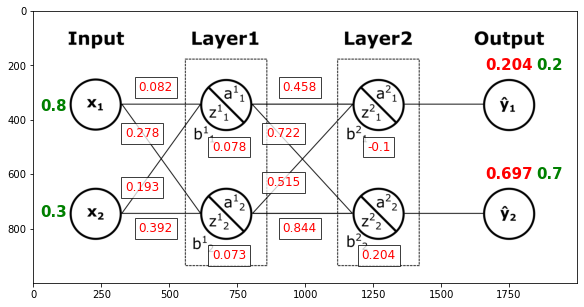

In [131]:
history_yhat, history_err = train_model(20,learning_rate=0.15)

In [132]:
def plot_history(history_yhat, history_err):
    # Set axis
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_axes([0.2,0.2,0.7,0.35])
    ax2 = fig.add_axes([0.2,0.6,0.7,0.35], ylim=(0,1))
    ax1.set_xlabel("Num of Trainings", fontsize=15)
    ax1.set_ylabel("Mean Square Error", fontsize=15)
    ax2.set_ylabel("Prediction",fontsize=15)
    ax2.set_title("Prediction vs Num of Training", fontsize=15)
    ax1.set_title("Error vs Num of Training", fontsize=15)
    
    
    # Plot yhat
    ax2.axhline(0.2, 0,1, color='tab:blue')
    ax2.text(0,0.21,"Real Y1 Value", va='bottom',ha='left', weight='bold')
    ax2.axhline(0.7, 0,1, color='tab:green')
    ax2.text(0,0.71,"Real Y2 Value", va='bottom',ha='left', weight='bold')
        
    ax2.plot([yhat[0] for yhat in history_yhat], color="tab:blue", marker='o', linestyle='--', label='Y1 Prediction')
    ax2.plot([yhat[1] for yhat in history_yhat], color="tab:green", marker='o', linestyle='--', label='Y2 Prediction')
    ax2.legend()
        
    # Plot error
    for idx, err in enumerate(history_err):
        ax1.plot(idx,err, color='black', marker='o')

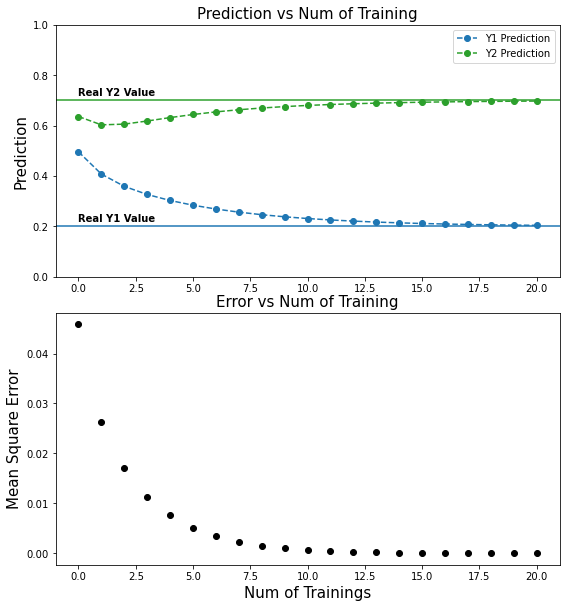

In [133]:
plot_history(history_yhat=history_yhat, history_err=history_err)

# Conclusion

## Meaning of "Back" Propagation
The term "Back" propagation confused me before this project. My first impression of this word is that the Neural Network optimizes the parameters from back to front, which is counter-intuitive because the gradient descent algorithm is able to update multiple parameters at the same time.

The "Back" propagation is meant to be used as an opposite concept of the "forward" propagation (Calculating predicted value and error with respect to the labels). The training of Neural Network consists of the following steps:
* __Initialization of parameters:__ I used fixed numbers, but ideally randomized numbers should be used.
* __Forward Propagation:__ Calculate the $\hat{y}$ with given parameters and calculate the error (cost function).
* __Back Propagation:__ Calculate the gradient. A __local gradient__ of a neuron is determined by input numbers from the previous layer, the output of the given layer, and the derivative of the cost function of the neuron
* __Learning:__ Optimize parameters with Gradient Descent Method
* Repeat Forward Propagation - Back Propagation - Learning

## Update Parameters "Individually"
At the first glance, updating parameters looks highly complicated task because all parameters are correlated to each other. However, partial derivative allows us to evaluate the __contribution of a certain parameter to the error__. With the gradient descent method, I was able to optimize individual parameters simultaneously.

## Visualization of ANN Model with 2 Hidden Layers.
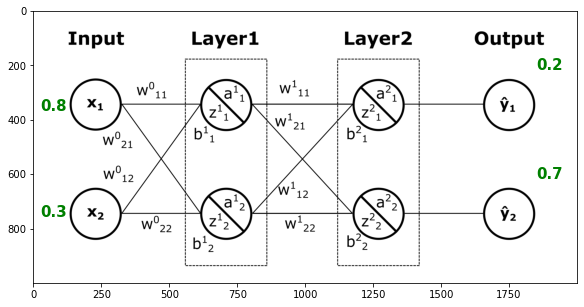
The model above has been trained 20 times with a 0.15 learning rate. (or equivalently 20 steps with 0.15 stepsize along the steepest descent) The evaluations after each step and the final model are obtained as below.

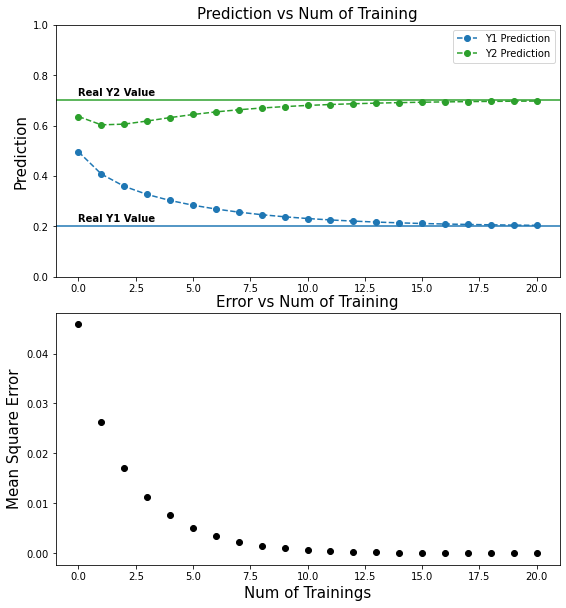

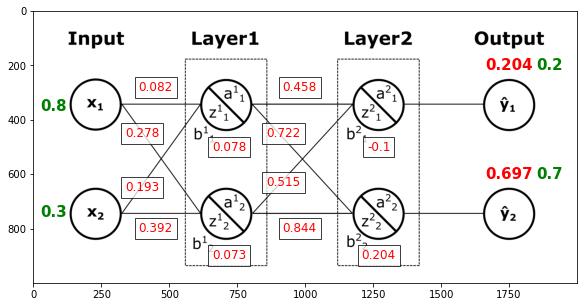
